Всього у нас 10 змінних. Всі 10 і опишемо.


Усі кількісні.

1. Pregnancies
2. Glucose
3. BloodPressure
4. SkinThickness
5. Insulin
6. BMI
7. DiabetesPedigreeFunction
8. Age
9. Outcome
10. Gender

Вагітность: Кількість вагітностей

Глюкоза: Концентрація глюкози в плазмі крові через 2 години в пероральному тесті толерантності до глюкози.

Кров'яний тиск: Діастолічний артеріальний тиск (мм рт. ст.).

Товщина шкіри: Товщина складки шкіри трицепса (мм).

Інсулін: 2-годинний сироватковий інсулін (МО/мл).

BMI: Індекс маси тіла (вага в кг/(зріст в м)^2).

Діабет Педіатричний: функція Педіатричного діабету.

Вік: Вік (років).

Результат: змінна класу (0 або 1) 268 із 768 дорівнює 1, інші дорівнюють 0.

Стать: 0 чоловік, 1 жінка.

Тепер перевіримо розподіл цих зміних

In [100]:
from scipy import stats
import pandas as pd
import numpy as np

data = pd.read_csv(r"C:\Users\kepkp\PycharmProjects\Study\python_deepdive\tasks\Analytics\RGR\diabetes.csv")

df = pd.DataFrame(data)
print(df)
df.info()

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  gender  
0                       0.627   50        1       0  
1  

In [101]:

# Тест Шапиро-Уилка
def shapiro_wilk_test(data):
    for col in data.columns:
        print(f"Shapiro-Wilk test for column '{col}':")
        _, p_val = stats.shapiro(data[col])
        is_normal = 'Normal' if p_val > 0.05 else 'Not Normal'
        print(f"P-value: {p_val}, \nDistribution: {is_normal}\n")


print("-" * 20, "Shapiro-Wilk Test", "-" * 20)
shapiro_wilk_test(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
                      'DiabetesPedigreeFunction', 'Age', 'Outcome', 'gender']])
print("-" * 60)

-------------------- Shapiro-Wilk Test --------------------
Shapiro-Wilk test for column 'Pregnancies':
P-value: 1.6100101271064348e-21, 
Distribution: Not Normal

Shapiro-Wilk test for column 'Glucose':
P-value: 1.987464880170986e-11, 
Distribution: Not Normal

Shapiro-Wilk test for column 'BloodPressure':
P-value: 1.5844936208677322e-28, 
Distribution: Not Normal

Shapiro-Wilk test for column 'SkinThickness':
P-value: 1.751799708531821e-21, 
Distribution: Not Normal

Shapiro-Wilk test for column 'Insulin':
P-value: 7.915339984765649e-34, 
Distribution: Not Normal

Shapiro-Wilk test for column 'BMI':
P-value: 1.8407586602041262e-15, 
Distribution: Not Normal

Shapiro-Wilk test for column 'DiabetesPedigreeFunction':
P-value: 2.4777990069755762e-27, 
Distribution: Not Normal

Shapiro-Wilk test for column 'Age':
P-value: 2.401829612553989e-24, 
Distribution: Not Normal

Shapiro-Wilk test for column 'Outcome':
P-value: 1.2922618893873923e-38, 
Distribution: Not Normal

Shapiro-Wilk test f

для впевненості візуалізуємо

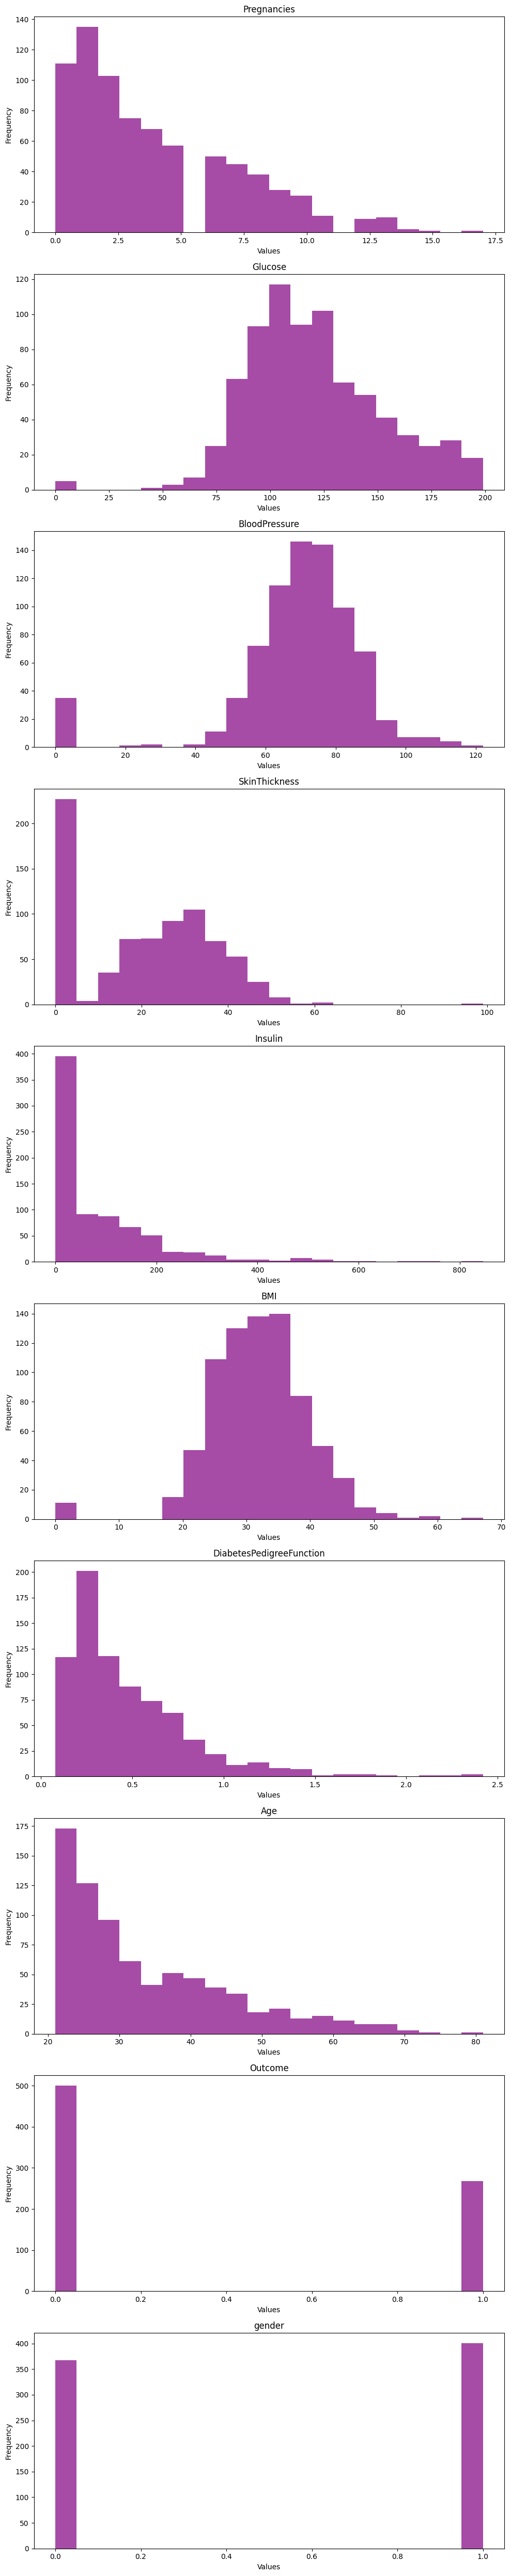

In [102]:
import matplotlib.pyplot as plt


def plot_histograms(dataframe, columns):
    num_plots = len(columns)
    fig, axs = plt.subplots(num_plots, 1, figsize=(10, num_plots * 5))
    for i, column in enumerate(columns):
        axs[i].hist(dataframe[column], bins=20, alpha=0.7, color='purple')
        axs[i].set_xlabel('Values')
        axs[i].set_ylabel('Frequency')
        axs[i].set_title(f'{column}')
    plt.tight_layout()
    plt.show()


columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',
           'Age', 'Outcome', 'gender']

plot_histograms(df, columns)

Ніде нема нормального розподілу, тому будемо використовувати непараметричні тести

1

перша гіпотеза : чи залежить глюкоза(Glucose)  від результату(Outcome)
для цього нам знадобиться  критерій   Манна-Уітні

Н0 парні групи рівні

Н1 парні групи відмінні

In [103]:
from scipy.stats import mannwhitneyu

ch1 = df[df["Outcome"] == 0]
ch2 = df[df["Outcome"] == 1]

# Застосування критерію Уілкоксона-Манна-Уітні
statistic, p_value = mannwhitneyu(ch1['Glucose'], ch2['Glucose'])

# Виведення результатів
print(f"Статистика U = {statistic}")
print(f"p-значення = {p_value}")

if p_value > 0.05:
    print("H0 (p > 0.05)")
else:
    print("H1 (p <= 0.05)")

Статистика U = 28390.5
p-значення = 1.2007268419877137e-39
H1 (p <= 0.05)


для впевненості візуалізуємо

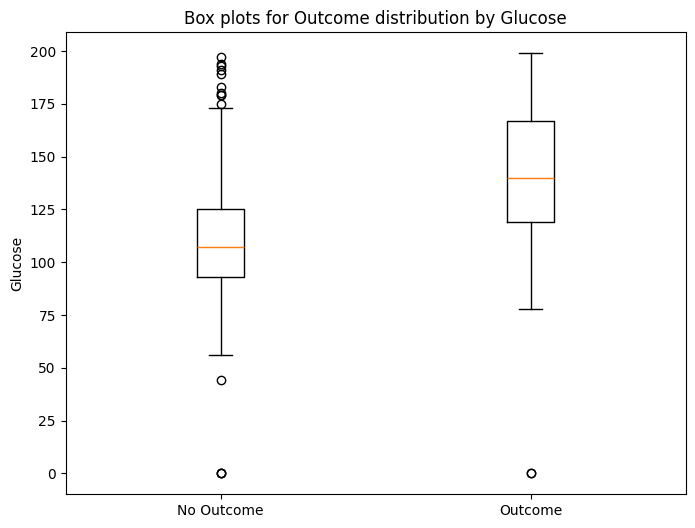

In [104]:

groups_ch = [ch1['Glucose'], ch2['Glucose']]

plt.figure(figsize=(8, 6))
plt.boxplot(groups_ch, labels=['No Outcome', 'Outcome'])

plt.title("Box plots for Outcome distribution by Glucose")
plt.ylabel("Glucose")
plt.show()

p-значення менше за 0,05, тому ми відкидаємо нульову гіпотезу, і можемо припустити, що
середні значення двох вибірок відрізняються.

Отже, значення глюкози відрізняється наявністю чи відсутністю результату.

2

чи залежить  кровяний тиск від результату.

застосуємо тей же критерій


In [105]:
from scipy.stats import mannwhitneyu

ch1 = df[df["Outcome"] == 0]
ch2 = df[df["Outcome"] == 1]

# Застосування критерію Уілкоксона-Манна-Уітні
statistic, p_value = mannwhitneyu(ch1['BloodPressure'], ch2['BloodPressure'])

print(f"Статистика U = {statistic}")
print(f"p-значення = {p_value}")

if p_value > 0.05:
    print("H0 (p > 0.05)")
else:
    print("H1 (p <= 0.05)")

Статистика U = 55414.5
p-значення = 7.5585124602395e-05
H1 (p <= 0.05)


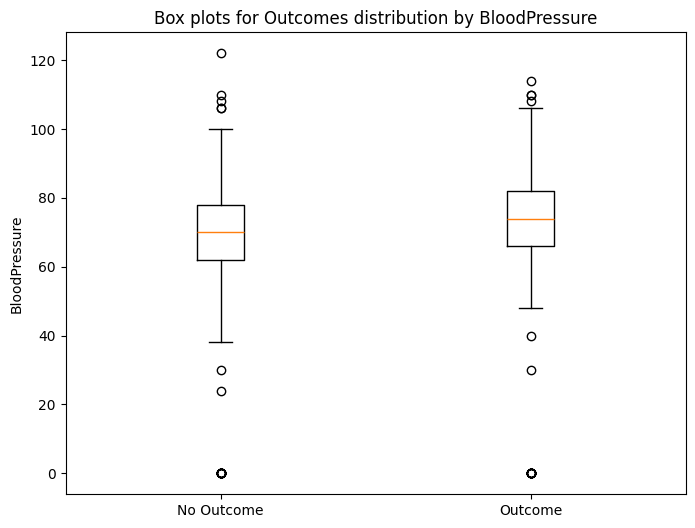

In [106]:
groups_ch = [ch1['BloodPressure'], ch2['BloodPressure']]

plt.figure(figsize=(8, 6))
plt.boxplot(groups_ch, labels=['No Outcome', 'Outcome'])

plt.title("Box plots for Outcomes distribution by BloodPressure")
plt.ylabel("BloodPressure")
plt.show()

p-значення менше за 0,05, тому ми відкидаємо нульову гіпотезу, і можемо припустити, що середні значення двох вибірок відрізняються.

Отже, значення кровяного тиску відрізняється наявністю чи відсутністю результату.

3

H0: Немає статистично значущої різниці у середніх рангах між групами A, B та C у впливі рівня вагітність на індекс маси тіла.
H1: Існує статистично значуща різниця у середніх рангах між групами A, B та C у впливі рівня вагітності на індекс маси тіла.

Pregnancies від індексу маси тіла.

In [107]:
from scipy.stats import kruskal

ch1 = df[df["Pregnancies"] == 1]
ch2 = df[df["Pregnancies"] == 4]

ch3 = df[df["Pregnancies"] == 7]
ch4 = df[df["Pregnancies"] == 10]

ch6 = df[df["Pregnancies"] == 13]

statistic, p_value = kruskal(ch1['BMI'], ch2['BMI'], ch3['BMI'], ch4['BMI'],
                             ch6['BMI'])

# Виведення результатів
print(f"Статистика U = {statistic}")
print(f"p-значення = {p_value}")

if p_value > 0.05:
    print("H0 (p > 0.05)")
else:
    print("H1 (p <= 0.05)")

Статистика U = 5.420671525879157
p-значення = 0.24679101631665934
H0 (p > 0.05)


візуалізіємо

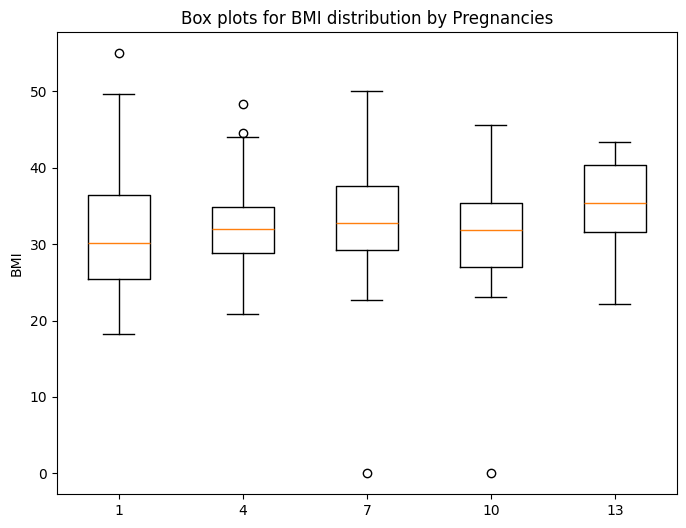

In [108]:

groups_ch = [ch1['BMI'], ch2['BMI'], ch3['BMI'], ch4['BMI'], ch6['BMI']]

plt.figure(figsize=(8, 6))
plt.boxplot(groups_ch, labels=['1', '4', '7', '10', '13'])

plt.title("Box plots for BMI distribution by Pregnancies")
plt.ylabel("BMI")
plt.show()

отже, Немає статистично значущої різниці у середніх рангах між групами A, B та C у впливі рівня вігатності на індекс маси тіла.

4

чи впливає DiabetesPedigreeFunction на  Outcome

для цього нам знадобиться критерій Манна-Уітні

Н0 парні групи рівні

Н1 парні групи відмінні

In [109]:
from scipy.stats import mannwhitneyu

ch1 = df[df["Outcome"] == 0]
ch2 = df[df["Outcome"] == 1]

# Застосування критерію Уілкоксона-Манна-Уітні
statistic, p_value = mannwhitneyu(ch1['DiabetesPedigreeFunction'], ch2['DiabetesPedigreeFunction'])

print(f"Статистика U = {statistic}")
print(f"p-значення = {p_value}")

if p_value > 0.05:
    print("H0 (p > 0.05)")
else:
    print("H1 (p <= 0.05)")

Статистика U = 52769.0
p-значення = 1.1965834413919491e-06
H1 (p <= 0.05)


візуалізуємо для впевненості

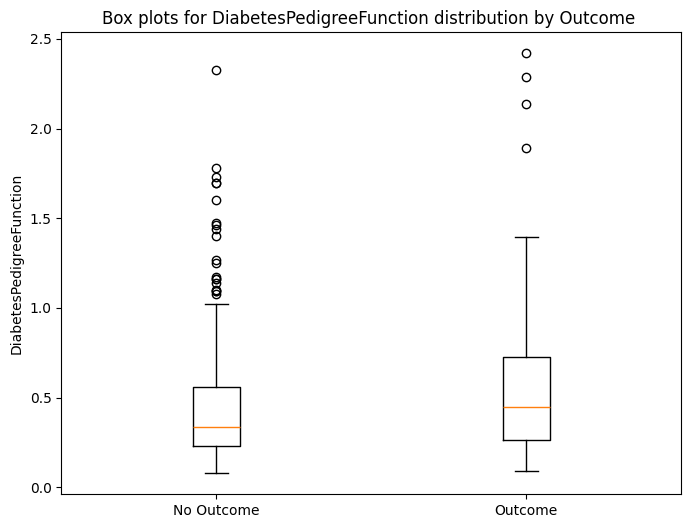

In [110]:
groups_ch = [ch1['DiabetesPedigreeFunction'], ch2['DiabetesPedigreeFunction']]

plt.figure(figsize=(8, 6))
plt.boxplot(groups_ch, labels=['No Outcome', 'Outcome'])

plt.title("Box plots for DiabetesPedigreeFunction distribution by Outcome ")
plt.ylabel("DiabetesPedigreeFunction")
plt.show()

p-значення менше за 0,05, тому ми відкидаємо нульову гіпотезу, і можемо припустити, що середні значення двох вибірок відрізняються.

Отже, значення Діабет Спадковість відрізняється наявністю чи відсутністю результату.

5

чи впливає SkinThickness на рівень Outcome

для цього нам знадобиться критерій Манна-Уітні

Н0 парні групи рівні

Н1 парні групи відмінні

In [111]:
from scipy.stats import mannwhitneyu

ch1 = df[df["Outcome"] == 0]
ch2 = df[df["Outcome"] == 1]

# Застосування критерію Уілкоксона-Манна-Уітні
statistic, p_value = mannwhitneyu(ch1['SkinThickness'], ch2['SkinThickness'])

# Виведення результатів
print(f"Статистика U = {statistic}")
print(f"p-значення = {p_value}")

if p_value > 0.05:
    print("H0 (p > 0.05)")
else:
    print("H1 (p <= 0.05)")

Статистика U = 59814.0
p-значення = 0.012961829559891893
H1 (p <= 0.05)


візуалізуємо

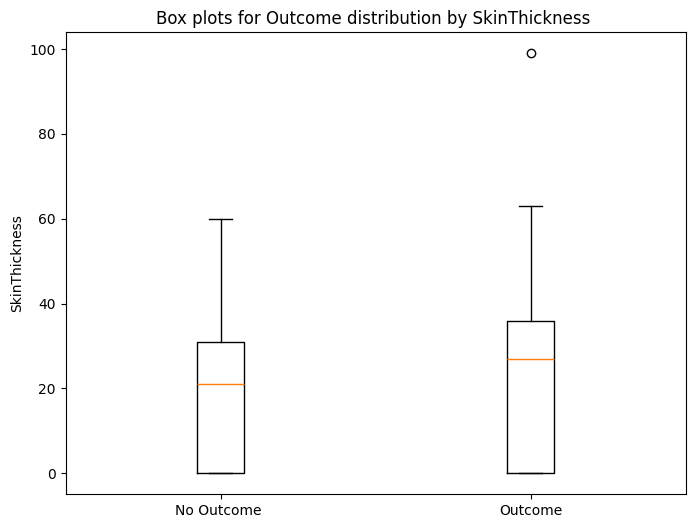

In [112]:

groups_ch = [ch1['SkinThickness'], ch2['SkinThickness']]

plt.figure(figsize=(8, 6))
plt.boxplot(groups_ch, labels=['No Outcome ', 'Outcome'])

plt.title("Box plots for Outcome distribution by SkinThickness ")
plt.ylabel("SkinThickness")
plt.show()

Отже, SkinThickness впливає на рівень Outcome

6

Outcome на Insulin

для цього нам знадобиться критерій Манна-Уітні

Н0 парні групи рівні

Н1 парні групи відмінні

In [113]:
from scipy.stats import mannwhitneyu

ch1 = df[df["Outcome"] == 0]
ch2 = df[df["Outcome"] == 1]

# Застосування критерію Уілкоксона-Манна-Уітні
statistic, p_value = mannwhitneyu(ch1['Insulin'], ch2['Insulin'])

# Виведення результатів
print(f"Статистика U = {statistic}")
print(f"p-значення = {p_value}")

if p_value > 0.05:
    print("H0 (p > 0.05)")
else:
    print("H1 (p <= 0.05)")

Статистика U = 61926.5
p-значення = 0.06566036997824369
H0 (p > 0.05)


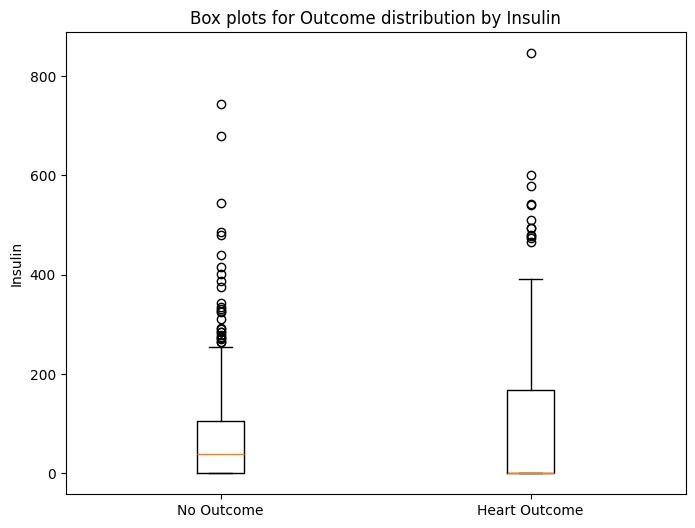

In [114]:

groups_ch = [ch1['Insulin'], ch2['Insulin']]

plt.figure(figsize=(8, 6))
plt.boxplot(groups_ch, labels=['No Outcome', 'Heart Outcome'])

plt.title("Box plots for Outcome distribution by Insulin")
plt.ylabel("Insulin")
plt.show()

отже не впливає

7. Outcome на індекс маси тіла

для цього нам знадобиться критерій Манна-Уітні

Н0 парні групи рівні

Н1 парні групи відмінні

In [115]:
from scipy.stats import mannwhitneyu

ch1 = df[df["Outcome"] == 0]
ch2 = df[df["Outcome"] == 1]

# Застосування критерію Уілкоксона-Манна-Уітні
statistic, p_value = mannwhitneyu(ch1['BMI'], ch2['BMI'])

# Виведення результатів
print(f"Статистика U = {statistic}")
print(f"p-значення = {p_value}")

if p_value > 0.05:
    print("H0 (p > 0.05)")
else:
    print("H1 (p <= 0.05)")

Статистика U = 41866.0
p-значення = 9.73078977612743e-18
H1 (p <= 0.05)


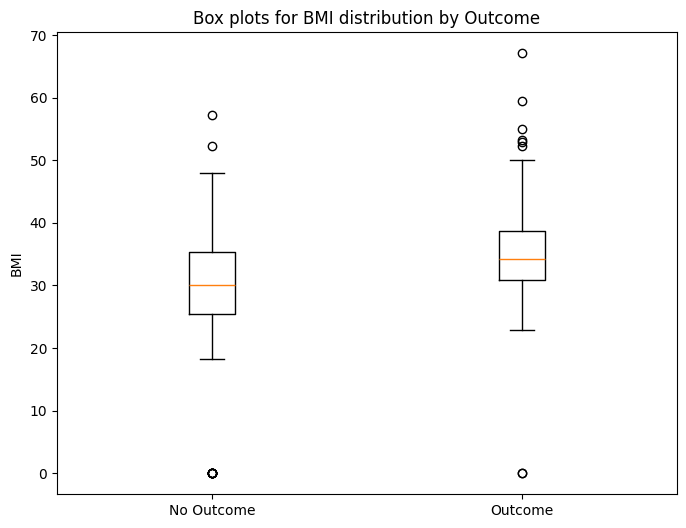

In [116]:

groups_ch = [ch1['BMI'], ch2['BMI']]

plt.figure(figsize=(8, 6))
plt.boxplot(groups_ch, labels=['No Outcome', 'Outcome'])

plt.title("Box plots for BMI distribution by Outcome")
plt.ylabel("BMI")
plt.show()

Не впливає.

8. Pregnancies на Outcome

для цього хи кадрат пирсона


для початку зробимо таблицю спряженості

Основна (нульова). Ознаки не пов'язані.
• Конкуруюча (альтернативна). Ознаки пов'язані

In [117]:
A = pd.crosstab(data["Pregnancies"], data["Outcome"], normalize='index') * 100
print(A)

Outcome              0           1
Pregnancies                       
0            65.765766   34.234234
1            78.518519   21.481481
2            81.553398   18.446602
3            64.000000   36.000000
4            66.176471   33.823529
5            63.157895   36.842105
6            68.000000   32.000000
7            44.444444   55.555556
8            42.105263   57.894737
9            35.714286   64.285714
10           58.333333   41.666667
11           36.363636   63.636364
12           55.555556   44.444444
13           50.000000   50.000000
14            0.000000  100.000000
15            0.000000  100.000000
17            0.000000  100.000000


In [118]:
import scipy.stats as stats

chistat, pv = stats.chisquare(f_obs=A, axis=None)

print("Хі-квадрат статистика:", chistat)
print("p-value:", pv)
if pv > 0.05:
    print("H0 (p > 0.05)")
else:
    print("H1 (p <= 0.05)")

Хі-квадрат статистика: 443.8328938992372
p-value: 2.018228661845038e-73
H1 (p <= 0.05)


отже вагітність і результати повязані

9.Pregnancies на gender

Основна (нульова). Ознаки не пов'язані. • Конкуруюча (альтернативна). Ознаки пов'язані

In [119]:
A = pd.crosstab(data["Pregnancies"], data["gender"], normalize='index') * 100
print(A)

gender                0           1
Pregnancies                        
0             48.648649   51.351351
1             46.666667   53.333333
2             43.689320   56.310680
3             45.333333   54.666667
4             50.000000   50.000000
5             61.403509   38.596491
6             52.000000   48.000000
7             37.777778   62.222222
8             50.000000   50.000000
9             60.714286   39.285714
10            37.500000   62.500000
11            36.363636   63.636364
12            55.555556   44.444444
13            30.000000   70.000000
14           100.000000    0.000000
15             0.000000  100.000000
17             0.000000  100.000000


In [120]:
import scipy.stats as stats

chistat, pv = stats.chisquare(f_obs=A, axis=None)

print("Хі-квадрат статистика:", chistat)
print("p-value:", pv)
if pv > 0.05:
    print("H0 (p > 0.05)")
else:
    print("H1 (p <= 0.05)")

Хі-квадрат статистика: 349.83291896027214
p-value: 1.3288973084322595e-54
H1 (p <= 0.05)


Ознаки повязані

10.Age на Gender

Н0 парні групи рівні

Н1 парні групи відмінні

In [121]:
from scipy.stats import mannwhitneyu

ch1 = df[df["gender"] == 0]
ch2 = df[df["gender"] == 1]

# Застосування критерію Уілкоксона-Манна-Уітні
statistic, p_value = mannwhitneyu(ch1['Age'], ch2['Age'])

# Виведення результатів
print(f"Статистика U = {statistic}")
print(f"p-значення = {p_value}")

if p_value > 0.05:
    print("H0 (p > 0.05)")
else:
    print("H1 (p <= 0.05)")

Статистика U = 76081.5
p-значення = 0.4155018246516178
H0 (p > 0.05)


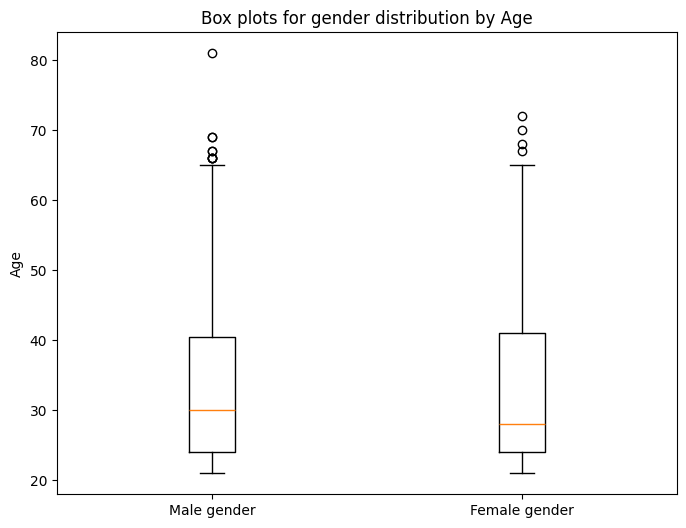

In [122]:
groups_ch = [ch1['Age'], ch2['Age']]

plt.figure(figsize=(8, 6))
plt.boxplot(groups_ch, labels=['Male gender', 'Female gender'])

plt.title("Box plots for gender distribution by Age")
plt.ylabel("Age")
plt.show()

отже, групи рівні

11.SkinThickness на Gender

тест хи квадрат пирсона

гіпотези

Основна (нульова). Ознаки не пов'язані.

• Конкуруюча (альтернативна). Ознаки пов'язані

In [123]:
A = pd.crosstab(data["SkinThickness"], data["gender"], normalize='index') * 100
print(A)

gender                  0           1
SkinThickness                        
0               47.136564   52.863436
7               50.000000   50.000000
8                0.000000  100.000000
10              20.000000   80.000000
11              66.666667   33.333333
12              14.285714   85.714286
13              45.454545   54.545455
14               0.000000  100.000000
15              35.714286   64.285714
16              66.666667   33.333333
17              35.714286   64.285714
18              35.000000   65.000000
19              61.111111   38.888889
20              38.461538   61.538462
21              40.000000   60.000000
22              43.750000   56.250000
23              50.000000   50.000000
24              25.000000   75.000000
25              62.500000   37.500000
26              62.500000   37.500000
27              34.782609   65.217391
28              45.000000   55.000000
29              64.705882   35.294118
30              51.851852   48.148148
31          

In [124]:
import scipy.stats as stats

chistat, pv = stats.chisquare(f_obs=A, axis=None)

print("Хі-квадрат статистика:", chistat)
print("p-value:", pv)
if pv > 0.05:
    print("H0 (p > 0.05)")
else:
    print("H1 (p <= 0.05)")

Хі-квадрат статистика: 1210.505104018135
p-value: 1.7885510472549115e-189
H1 (p <= 0.05)


Ознаки пов*язані

12.SkinThickness на Outcome

Основна (нульова). Ознаки не пов'язані.

• Конкуруюча (альтернативна). Ознаки пов'язані

In [125]:
A = pd.crosstab(data["SkinThickness"], data["Outcome"], normalize='index') * 100
print(A)

Outcome                 0           1
SkinThickness                        
0               61.233480   38.766520
7               50.000000   50.000000
8              100.000000    0.000000
10             100.000000    0.000000
11             100.000000    0.000000
12              85.714286   14.285714
13              90.909091    9.090909
14              66.666667   33.333333
15              92.857143    7.142857
16             100.000000    0.000000
17              85.714286   14.285714
18              80.000000   20.000000
19              83.333333   16.666667
20              84.615385   15.384615
21              80.000000   20.000000
22              75.000000   25.000000
23              81.818182   18.181818
24              50.000000   50.000000
25              68.750000   31.250000
26              62.500000   37.500000
27              69.565217   30.434783
28              75.000000   25.000000
29              58.823529   41.176471
30              66.666667   33.333333
31          

In [126]:
import scipy.stats as stats

chistat, pv = stats.chisquare(f_obs=A, axis=None)

print("Хі-квадрат статистика:", chistat)
print("p-value:", pv)
if pv > 0.05:
    print("H0 (p > 0.05)")
else:
    print("H1 (p <= 0.05)")

Хі-квадрат статистика: 1943.871729652252
p-value: 0.0
H1 (p <= 0.05)


Ознаки повязані

13.Pregnancies на SkinThickness

Основна (нульова). Ознаки не пов'язані.

• Конкуруюча (альтернативна). Ознаки пов'язані



In [127]:
A = pd.crosstab(data["SkinThickness"], data["Pregnancies"], normalize='index') * 100
print(A)

Pregnancies            0           1           2          3          4   \
SkinThickness                                                             
0               14.096916    7.048458   10.132159   7.929515  11.894273   
7                0.000000    0.000000    0.000000   0.000000   0.000000   
8                0.000000  100.000000    0.000000   0.000000   0.000000   
10              20.000000   40.000000   20.000000  20.000000   0.000000   
11               0.000000   50.000000    0.000000  33.333333  16.666667   
12               0.000000   42.857143    0.000000  14.285714  42.857143   
13               9.090909   45.454545   18.181818  27.272727   0.000000   
14              33.333333   16.666667   33.333333   0.000000  16.666667   
15               7.142857   28.571429   14.285714  21.428571  14.285714   
16              16.666667   16.666667   33.333333  33.333333   0.000000   
17              21.428571   14.285714   35.714286   0.000000  14.285714   
18              10.000000

In [128]:
import scipy.stats as stats

chistat, pv = stats.chisquare(f_obs=A, axis=None)

print("Хі-квадрат статистика:", chistat)
print("p-value:", pv)
if pv > 0.05:
    print("H0 (p > 0.05)")
else:
    print("H1 (p <= 0.05)")

Хі-квадрат статистика: 23766.133924679154
p-value: 0.0
H1 (p <= 0.05)


Ознаки повязані

14. Glucose на Gender

Н0 парні групи рівні

Н1 парні групи відмінні

In [129]:
from scipy.stats import mannwhitneyu

ch1 = df[df["gender"] == 0]
ch2 = df[df["gender"] == 1]

# Застосування критерію Уілкоксона-Манна-Уітні
statistic, p_value = mannwhitneyu(ch1['Glucose'], ch2['Glucose'])

# Виведення результатів
print(f"Статистика U = {statistic}")
print(f"p-значення = {p_value}")

if p_value > 0.05:
    print("H0 (p > 0.05)")
else:
    print("H1 (p <= 0.05)")

Статистика U = 74922.5
p-значення = 0.6629202071540938
H0 (p > 0.05)


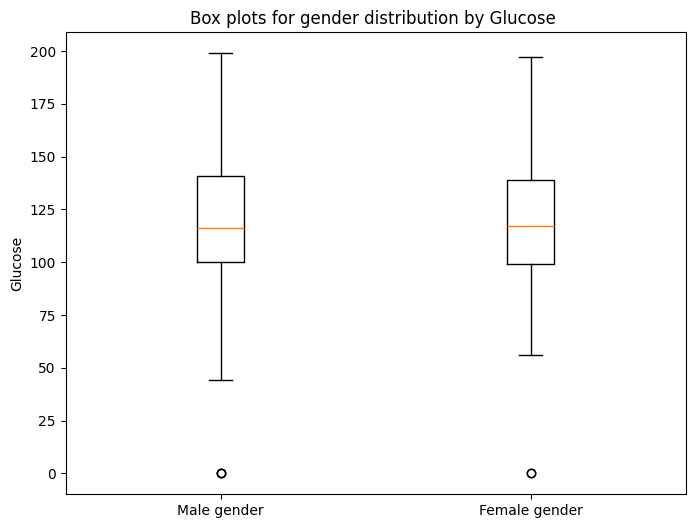

In [130]:
groups_ch = [ch1['Glucose'], ch2['Glucose']]

plt.figure(figsize=(8, 6))
plt.boxplot(groups_ch, labels=['Male gender', 'Female gender'])

plt.title("Box plots for gender distribution by Glucose ")
plt.ylabel("Glucose")
plt.show()

Групи рівні

15. Glucose на вагітність


H0: Немає статистично значущої різниці у середніх рангах між групами A, B та C у впливі вагітності та глюкози.
H1: Існує статистично значуща різниця у середніх рангах між групами A, B та C у впливі вагітності на глюкозу.


In [131]:
from scipy.stats import kruskal

ch1 = df[df["Pregnancies"] == 1]
ch2 = df[df["Pregnancies"] == 4]

ch3 = df[df["Pregnancies"] == 7]
ch4 = df[df["Pregnancies"] == 10]

ch6 = df[df["Pregnancies"] == 13]

statistic, p_value = kruskal(ch1['Glucose'], ch2['Glucose'], ch3['Glucose'], ch4['Glucose'], ch6['Glucose'])

# Виведення результатів
print(f"Статистика U = {statistic}")
print(f"p-значення = {p_value}")

if p_value > 0.05:
    print("H0 (p > 0.05)")
else:
    print("H1 (p <= 0.05)")

Статистика U = 19.82933503552903
p-значення = 0.0005396660750248495
H1 (p <= 0.05)


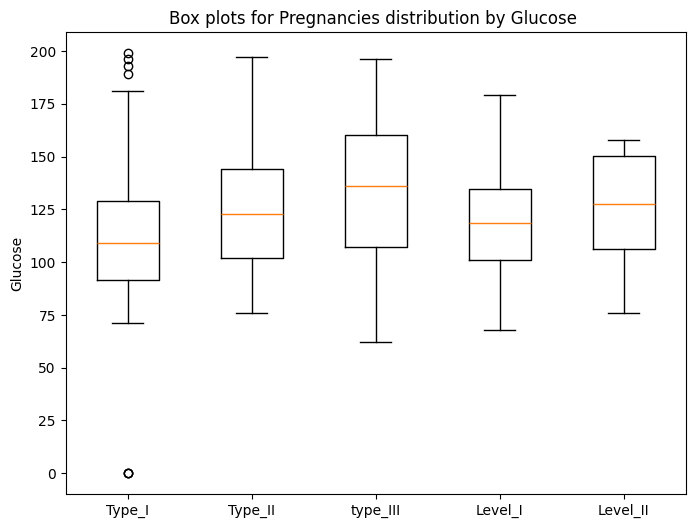

In [132]:

groups_ch = [ch1['Glucose'], ch2['Glucose'], ch3['Glucose'], ch4['Glucose'], ch6['Glucose']]

plt.figure(figsize=(8, 6))
plt.boxplot(groups_ch, labels=['Type_I', 'Type_II', 'type_III', 'Level_I', 'Level_II'])

plt.title("Box plots for Pregnancies distribution by Glucose ")
plt.ylabel("Glucose")
plt.show()

по графікам і тесту бачимо що різниця є

16. Gender на BloodPressure

Тест манова уитни

Н0 парні групи рівні

Н1 парні групи відмінні

In [133]:
from scipy.stats import mannwhitneyu

ch1 = df[df["gender"] == 0]
ch2 = df[df["gender"] == 1]

# Застосування критерію Уілкоксона-Манна-Уітні
statistic, p_value = mannwhitneyu(ch1['BloodPressure'], ch2['BloodPressure'])

print(f"Статистика U = {statistic}")
print(f"p-значення = {p_value}")

if p_value > 0.05:
    print("H0 (p > 0.05)")
else:
    print("H1 (p <= 0.05)")

Статистика U = 74497.0
p-значення = 0.7659755238788207
H0 (p > 0.05)


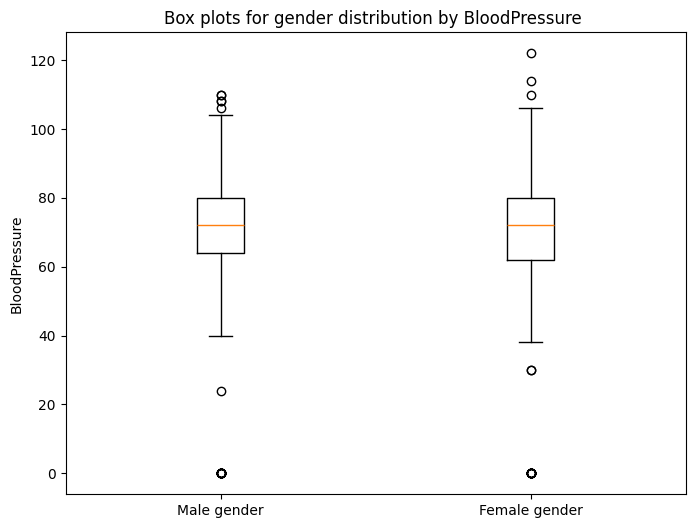

In [134]:
groups_ch = [ch1['BloodPressure'], ch2['BloodPressure']]

plt.figure(figsize=(8, 6))
plt.boxplot(groups_ch, labels=['Male gender', 'Female gender'])

plt.title("Box plots for gender distribution by BloodPressure ")
plt.ylabel("BloodPressure")
plt.show()

групи рівні практично